In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data

In [2]:
import seaborn as sns

print(sns.get_dataset_names())

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


/opt/conda/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /opt/conda/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


### 2. Bar plot

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_day = tips.groupby("day").mean().reset_index()
tips_day

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


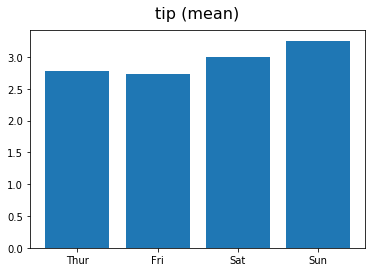

In [5]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"])
ax.set_title("tip (mean)", fontsize=16, pad=12)

plt.show()

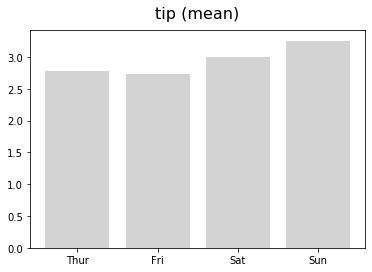

In [6]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"], color="lightgray")
ax.set_title("tip (mean)", fontsize=16, pad=12)

plt.show()

In [7]:
ax.patches

In [8]:
# source code for matplotlib.patches
# https://matplotlib.org/3.3.1/_modules/matplotlib/patches.html

for i in range(len(ax.patches)):
    print(f"height of patch[{i}] = {ax.patches[i].get_height()}")

height of patch[0] = 2.771451612903226
height of patch[1] = 2.734736842105263
height of patch[2] = 2.993103448275862
height of patch[3] = 3.255131578947369


In [9]:
for i in range(len(ax.patches)):
    print(f"facecolor of patch[{i}] = {ax.patches[i].get_facecolor()}")
    print(f"edgecolor of patch[{i}] = {ax.patches[i].get_edgecolor()}\n")

facecolor of patch[0] = (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0)
edgecolor of patch[0] = (0.0, 0.0, 0.0, 0.0)

facecolor of patch[1] = (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0)
edgecolor of patch[1] = (0.0, 0.0, 0.0, 0.0)

facecolor of patch[2] = (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0)
edgecolor of patch[2] = (0.0, 0.0, 0.0, 0.0)

facecolor of patch[3] = (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0)
edgecolor of patch[3] = (0.0, 0.0, 0.0, 0.0)



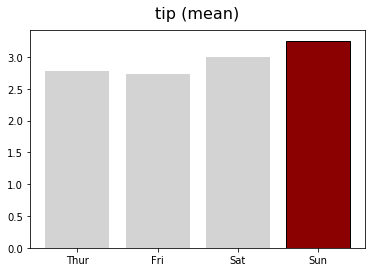

In [10]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"], color="lightgray")
ax.set_title("tip (mean)", fontsize=16, pad=12)

# Sunday
ax.patches[3].set_facecolor("darkred")
ax.patches[3].set_edgecolor("black")

plt.show()

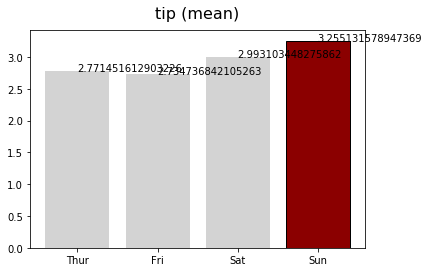

In [11]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"], color="lightgray")
ax.set_title("tip (mean)", fontsize=16, pad=12)

# Values
for i in range(4):
    ax.text(i, tips_day["tip"].loc[i], tips_day["tip"].loc[i])

# Sunday
ax.patches[3].set_facecolor("darkred")
ax.patches[3].set_edgecolor("black")

plt.show()

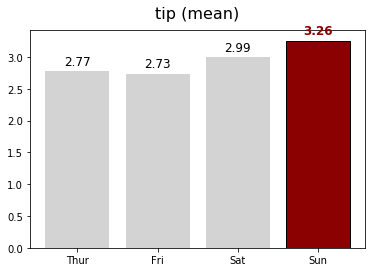

In [12]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"], color="lightgray")
ax.set_title("tip (mean)", fontsize=16, pad=12)

# Values
h_pad = 0.1
for i in range(4):
    fontweight = "normal"
    color = "k"
    if i == 3:
        fontweight = "bold"
        color = "darkred"
    
    ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
            horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

# Sunday
ax.patches[3].set_facecolor("darkred")
ax.patches[3].set_edgecolor("black")

plt.show()

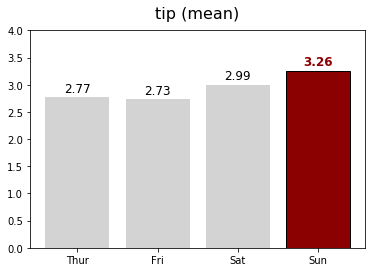

In [13]:
fig, ax = plt.subplots()
ax.bar(tips_day["day"], tips_day["tip"], color="lightgray")
ax.set_title("tip (mean)", fontsize=16, pad=12)

# Values
h_pad = 0.1
for i in range(4):
    fontweight = "normal"
    color = "k"
    if i == 3:
        fontweight = "bold"
        color = "darkred"
    
    ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
            horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

# Sunday
ax.patches[3].set_facecolor("darkred")
ax.patches[3].set_edgecolor("black")

# set_range
ax.set_ylim(0, 4)

plt.show()

### 3. Scatter Plot

In [16]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [17]:
penguins["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

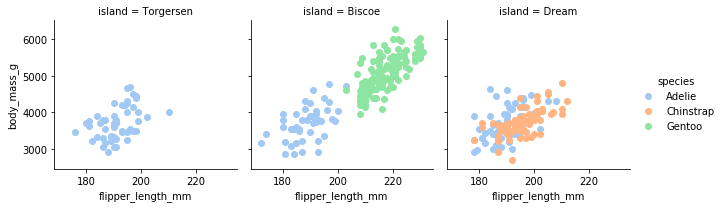

In [34]:
g = sns.FacetGrid(penguins, col="island", hue="species", palette="pastel")
g.map(plt.scatter, "flipper_length_mm", "body_mass_g", )
g.add_legend()
plt.show()

In [36]:
penguins_is = penguins.groupby(["island", "species"]).mean()
penguins_is

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie          38.975000      18.370455         188.795455   
          Gentoo          47.504878      14.982114         217.186992   
Dream     Adelie          38.501786      18.251786         189.732143   
          Chinstrap       48.833824      18.420588         195.823529   
Torgersen Adelie          38.950980      18.429412         191.196078   

                     body_mass_g  
island    species                 
Biscoe    Adelie     3709.659091  
          Gentoo     5076.016260  
Dream     Adelie     3688.392857  
          Chinstrap  3733.088235  
Torgersen Adelie     3706.372549

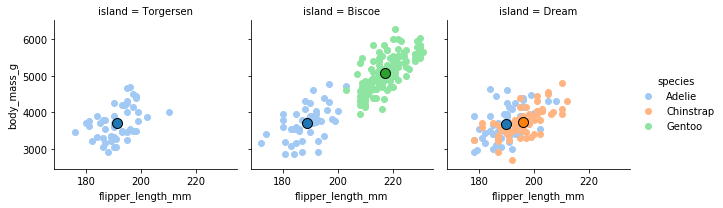

In [44]:
g = sns.FacetGrid(penguins, col="island", hue="species", palette="pastel")
g.map(plt.scatter, "flipper_length_mm", "body_mass_g", )
g.add_legend()

# add means

g.axes[0, 0].scatter(penguins_is["flipper_length_mm"].loc[("Torgersen", "Adelie")],
                     penguins_is["body_mass_g"].loc[("Torgersen", "Adelie")],
                     s=100, c="C0", ec="k"
                    )
g.axes[0, 1].scatter(penguins_is["flipper_length_mm"].loc[("Biscoe", "Adelie")],
                     penguins_is["body_mass_g"].loc[("Biscoe", "Adelie")],
                     s=100, c="C0", ec="k"
                    )
g.axes[0, 1].scatter(penguins_is["flipper_length_mm"].loc[("Biscoe", "Gentoo")],
                     penguins_is["body_mass_g"].loc[("Biscoe", "Gentoo")],
                     s=100, c="C2", ec="k"
                    )
g.axes[0, 2].scatter(penguins_is["flipper_length_mm"].loc[("Dream", "Adelie")],
                     penguins_is["body_mass_g"].loc[("Dream", "Adelie")],
                     s=100, c="C0", ec="k"
                    )
g.axes[0, 2].scatter(penguins_is["flipper_length_mm"].loc[("Dream", "Chinstrap")],
                     penguins_is["body_mass_g"].loc[("Dream", "Chinstrap")],
                     s=100, c="C1", ec="k"
                    )

plt.show()